<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP417_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/CAP4213-Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Computational Estatistis

* Luan Orion Baraúna

These code was provide for [this](https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb) course. 




## Exercice 2 - Pratical
The Global Precipitation Climatology Project (GPCP) is used as a reference dataset for accomplishing climate precipitation prediction. Consider part of one GPCP's dataset shown [here](https://github.com/vsantjr/CAP/blob/master/CAP417/GPCP/gpcp_1980-2016.xlsx). It has monthly data from 1980 to 2016.

The only relevant variable of this dataset for this exercise is press, the surface pressure (in millibars). Hence, each row in this dataset has data acquired in a location (latitude, longitude), in a certain year and month. Hence, first entry shows that in january/1980 in the specificied location (latitude and longitude), surface pressure (press) is 993.735 millibars, and in february/1980, in the same location, surface pressure is 995.384 millibars, and so on.


Note that the values of each variable, including press, are continuous (real numbers). But here, we will define a random variable representing the outcomes of high surface pressure measurements in one year. A high surface pressure happens when the pressure is greater than the average of surface pressure values considering all months, years, and locations.


Note that the discrete random variable described above can be perfectly considered a Poisson random variable since it satisfies all the properties of the Poisson process.


Develop a program that can answer the following questions:

1. What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,600 (note: ',' means thousands)?
2. What is the probability that the outcomes of high surface pressure measurements in one year is exactly 5,830?
3. What is the probability that the outcomes of high surface pressure measurements in one year is less than or equal to 10,000?
4. What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,900?
5. Show the probability histogram for this problem.




In [ ]:
#Import Librarys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import collections as matcoll
import numpy as np
from scipy.stats import poisson
import math

In [ ]:
#Reading the data from github
df = pd.read_excel("https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/GPCP/gpcp_1980-2016.xlsx")

## 1 - What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,600 ?

In [ ]:
mu = int(df['press'].mean())
k1 = 5600
p1 = poisson.sf(k1, mu)
print(f"The probability of outcomes of high surface presure \n measurments in one year is greater than 5,600 is {p1}")

The probability of outcomes of high surface presure 
 measurments in one year is greater than 5,600 is 0.0


## 2 - What is the probability that the outcomes of high surface pressure measurements in one year is exactly 5,830?

In [ ]:
k2 = 5830
p2 = poisson.pmf(k2, mu)
print(f"The Probability of the outcomes of high surface presure \nmeasurments in one year is = 5,830 is {p2}")

The Probability of the outcomes of high surface presure 
measurments in one year is = 5,830 is 0.0


## 3 - What is the probability that the outcomes of high surface pressure measurements in one year is less than or equal to 10,000?


In [ ]:
# mathematically: k ≤ x
# cdf P(X ≤ x)
k3 = 10000
p3 = poisson.cdf(k3, mu)
print(f"The probability of the outcomes of high surface \npresure measurments in one year is ≤ 10,000 is {p3}")

The probability of the outcomes of high surface 
presure measurments in one year is ≤ 10,000 is 1.0


## 4 - What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,900?

In [ ]:
# mathematically: k ≥ x
# 1 - cdf P(X ≤ x)
k4 = 5900
p4 = poisson.sf(k4, mu)
print(f"The Probability of the outcomes of high surface presure\nmeasurments in one year is greater than 5,600 is {p4}")

The Probability of the outcomes of high surface presure
measurments in one year is greater than 5,600 is 0.0


## 5 - Show the probability histogram for this problem.

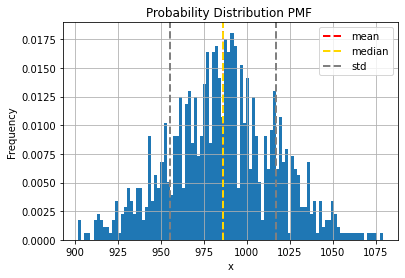

In [ ]:
d1 = np.random.poisson(mu, 1000)

#plot data distribuition
fig = figsize=(18, 10)

# set data
plt.hist(d1, bins=100, density=True, color ='C0')

# set text box and mean line
mu = np.mean(d1)
median = np.median(d1)
sigma = np.std(d1)

#textstr = '\n'.join((r'$\mu=%.2f$' % (mu, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (sigma, )))
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#axs.text(1.1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(median, color='gold', linestyle='dashed', linewidth=2,label='median')
plt.axvline(median + sigma, color='gray', linestyle='dashed', linewidth=2,label='std')
plt.axvline(median - sigma, color='gray', linestyle='dashed', linewidth=2)

#Create labels 
plt.xlabel('x')
plt.ylabel('Frequency')

# set title
plt.title('Probability Distribution PMF ')
plt.legend()
plt.grid()
plt.show()

## 6 CDF and Inverse CDF

In [ ]:
a = np.arange(mu - 70, mu + 200)
a = a.astype(int)
d2 = poisson.cdf(a, mu) * 100
d2 = d2.astype(int)

b = np.arange(mu - 70, mu + 200)
b = b.astype(int)
d3 = poisson.sf(b, mu) * 100
d3 = d3.astype(int)

917

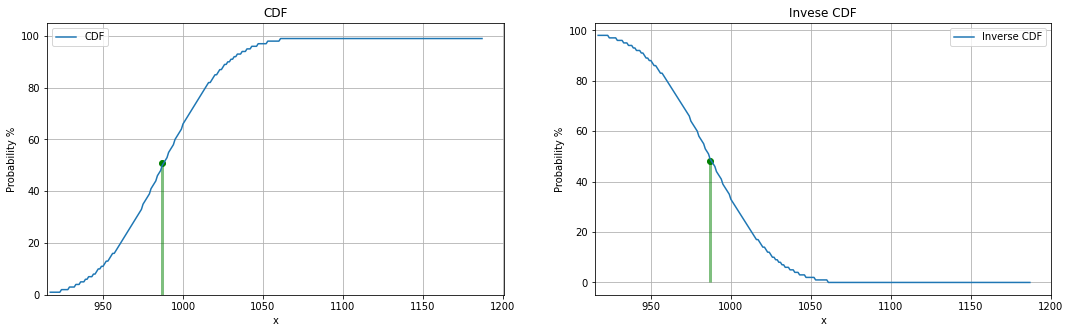

In [ ]:
fig, axs = plt.subplots(figsize=(18, 5))

plt.subplot(1,2,1)
plt.plot(a, d2,color='C0',label='CDF')
#plt.plot(b, d3,color='red',label='Inverse CDF')
plt.scatter(987, 51,color='g')
plt.vlines(987, 0, 51, colors='g', lw=3, alpha=0.5)
plt.xlim(xmin=915)
plt.ylim(ymin=0, ymax=105)
#plt.yticks(size=15) #SIZE OF TICKS
plt.xlabel('x')
plt.ylabel('Probability %')
plt.title('CDF')
plt.grid()
plt.legend()



plt.subplot(1,2,2)
plt.plot(b, d3,color='C0',label='Inverse CDF')
plt.scatter(987, 48,color='g')
plt.vlines(987, 0, 49, colors='g', lw=3, alpha=0.5)

#plt.spines['bottom'].set_position('zero')
plt.xlim(xmin=915)

#plt.yticks(size=15)
plt.xlabel('x')
plt.ylabel('Probability %')
plt.title('Invese CDF')
plt.grid()
plt.legend()


plt.show()